In [ ]:
"""
Code to change current working directory to the our code's and data's directory.
"""
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import pickle
%matplotlib inline  

drive.mount("/content/drive")
os.chdir("drive/MyDrive/Colab Notebooks/ML Project")
print("Current Working Directory:", os.getcwd())
train_dir = 'chest_xray/train'
test_dir = 'chest_xray/test'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current Working Directory: /content/drive/MyDrive/Colab Notebooks/ML Project


In [ ]:
def matrix(path, size = (64, 64)):
  mat = None
  #count = 0
  for image_name in os.listdir(path):
    img = image.load_img(path+'/'+image_name, target_size = size)#, color_mode="grayscale")
    arr = [image.img_to_array(img).ravel()]
    if(mat is None):
      mat = arr
    else:
      mat = np.concatenate((mat, arr))
  #  count+=1
  #  print(count)
  return mat
mat_normal = matrix(f'{train_dir}/NORMAL')
print("normal done")
mat_pneumonia = matrix(f'{train_dir}/PNEUMONIA')
print("pneumonia done")
mat_n_g = np.dot(mat_normal.reshape((1350, 64, 64, 3))[..., :3], [0.2989, 0.5870, 0.1140]).reshape(1350, 4096)
mat_p_g = np.dot(mat_pneumonia.reshape((3885, 64, 64, 3))[..., :3], [0.2989, 0.5870, 0.1140]).reshape(3885, 4096)

normal done
pneumonia done


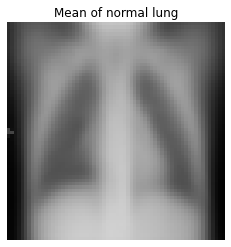

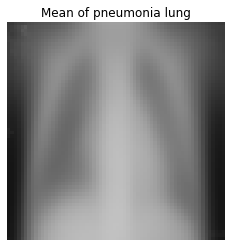

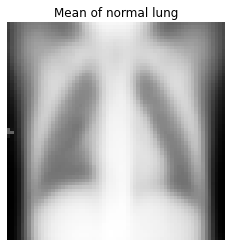

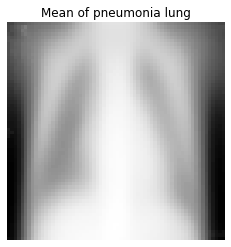

In [ ]:
def custom_plot(data, title, cmap_ = "Greys_r"):
  plt.imshow(data.astype("uint8"), cmap = cmap_)
  plt.title(title)
  plt.axis("off")
  plt.show()
def plot_mean_image(matrix, title, size = (64, 64)):
  mean = matrix.mean(axis = 0)
  mean = mean.reshape(size)
  custom_plot(mean, f'Mean of {title}')
  return mean

mean_normal = plot_mean_image(mat_normal, "normal lung", (64, 64, 3))
mean_pneumonia = plot_mean_image(mat_pneumonia, "pneumonia lung", (64, 64, 3))
mean_n_g = plot_mean_image(mat_n_g, "normal lung")
mean_p_g = plot_mean_image(mat_p_g, "pneumonia lung")

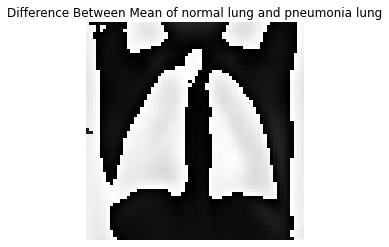

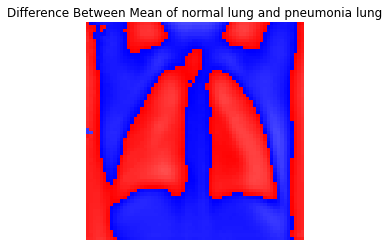

In [ ]:
custom_plot(mean_normal - mean_pneumonia, f'Difference Between Mean of normal lung and pneumonia lung', cmap_ = "bwr")
custom_plot(mean_n_g - mean_p_g, f'Difference Between Mean of normal lung and pneumonia lung', cmap_ = "bwr")

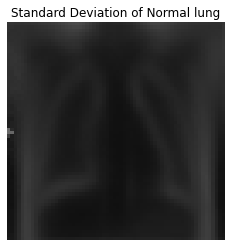

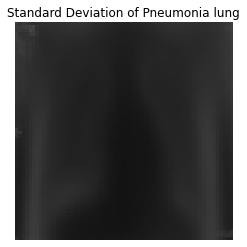

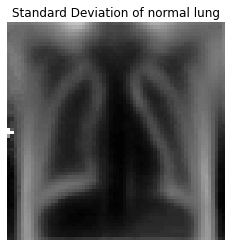

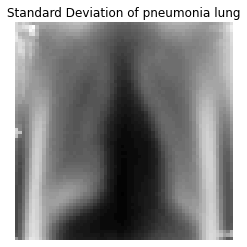

In [ ]:
def plot_standard_deviation(matrix, title, size = (64, 64)):
  std = np.std(matrix, axis = 0)
  std = std.reshape(size)
  custom_plot(std, f'Standard Deviation of {title}')
  return std
normal_std = plot_standard_deviation(mat_normal, "Normal lung", (64, 64, 3))
penumonia_std = plot_standard_deviation(mat_pneumonia, "Pneumonia lung", (64, 64, 3))
n_g_std = plot_standard_deviation(mat_n_g, "normal lung")
p_g_std = plot_standard_deviation(mat_p_g, "pneumonia lung")

Number of PC:  28


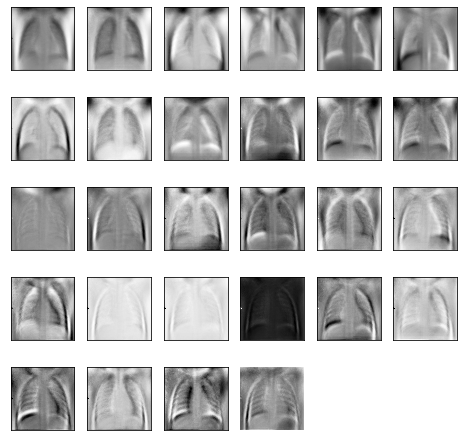

Number of PC:  14


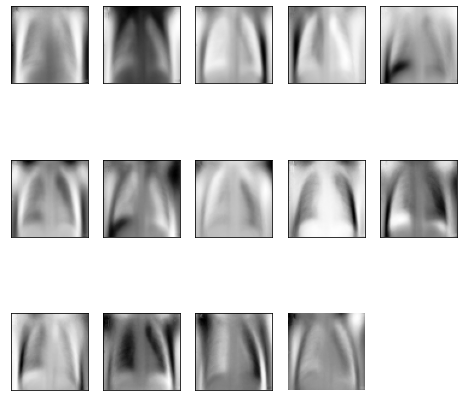

In [ ]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, n_comp = 0.7, size = (64, 64)):
  # fit PCA to describe n_comp * variability in the class
  pca = PCA(n_components = n_comp, whiten = True)
  pca.fit(full_mat)
  print('Number of PC: ', pca.n_components_)
  return pca
  
def plot_pca(pca, title, size = (64, 64)):
  # plot eigenimages in a grid
  n = pca.n_components_
  fig = plt.figure(figsize=(8, 8))
  r = int(n**.5)
  c = ceil(n/ r)
  for i in range(n):
      ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
      ax.imshow(pca.components_[i].reshape(size), cmap='Greys_r')
  plt.axis('off')
  plt.show()

plot_pca(eigenimages(mat_n_g), 'NORMAL')
plot_pca(eigenimages(mat_p_g), 'PNEUMONIA')